<a href="https://colab.research.google.com/github/tsangrebecca/BloomTech/blob/main/Sprint6/Module2/O4_UnderstandHowTreeEnsemblesReduceOverfittingComparedToASingleDecisionTreeWithUnlimitedDepth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import libraries and load in the data
import pandas as pd
import seaborn as sns

penguins = sns.load_dataset("penguins")

# Remove NaNs and nulls
penguins.dropna(inplace=True)

display(penguins.head())

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [2]:
# Create feature matrix
X = penguins.drop(['species', 'island', 'sex'], axis=1)

# Create the target array
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y = le.fit_transform(penguins['sex'])

# Create training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [3]:
# Import the classifiers

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

### Logistic Regression

In [4]:
# Fit the model with a logistic regression classifier

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print("Logistic regression model score: %.3f" % logreg.score(X_test, y_test))

Logistic regression model score: 0.857


### Decision Tree

In [5]:
# Fit the model with a decision tree classifier

tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
print("Decision tree model score: %.3f" % tree.score(X_test, y_test))

Decision tree model score: 0.917


In [7]:
# Fit the model with a decision tree classifier

tree = DecisionTreeClassifier(max_depth=100)
tree.fit(X_train, y_train)
print("Decision tree model score: %.3f" % tree.score(X_test, y_test))

print("Decision tree model score: %.3f" % tree.score(X_train, y_train))

Decision tree model score: 0.917
Decision tree model score: 1.000


In [8]:
# Look at training accuracy vs. test accuracy

# Decision tree
accuracy_train = []
accuracy_test = []

for i in range(1, 160, 5):
    tree = DecisionTreeClassifier(max_depth=i)
    tree.fit(X_train, y_train)
    accuracy_test.append(tree.score(X_test, y_test))
    accuracy_train.append(tree.score(X_train, y_train))

### Random Forest Classifier

In [6]:
# Fit the model with a random forest classifier

trees_rand = RandomForestClassifier()
trees_rand.fit(X_train, y_train)
print("Random forest model score: %.3f" % trees_rand.score(X_test, y_test))

Random forest model score: 0.917


In [9]:
# Look at training accuracy vs. test accuracy

# Random forest
rf_accuracy_train = []
rf_accuracy_test = []

for i in range(1, 160, 5):
    tree = RandomForestClassifier(max_depth=i)
    tree.fit(X_train, y_train)
    rf_accuracy_test.append(tree.score(X_test, y_test))
    rf_accuracy_train.append(tree.score(X_train, y_train))

### plot accuracy for decision tree and random forest

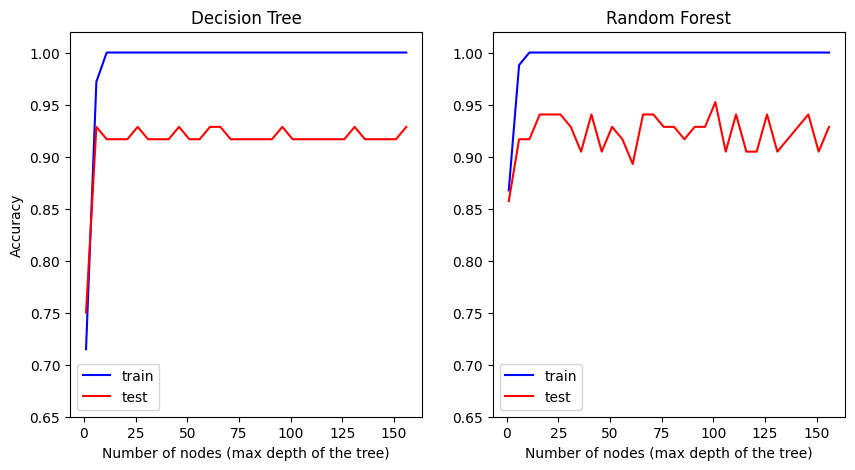

In [10]:
# Plot the results of the train vs. test accuracy
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))

xvals = range(1, 160, 5)
ax1.plot(xvals, accuracy_train, color='b', label='train')
ax1.plot(xvals, accuracy_test, color='red', label='test')
ax1.legend()

ax2.plot(xvals, rf_accuracy_train, color='b', label='train')
ax2.plot(xvals, rf_accuracy_test, color='red', label='test')
ax2.legend()

ax1.set_ylim([0.65, 1.02])
ax2.set_ylim([0.65, 1.02])

ax1.set_xlabel('Number of nodes (max depth of the tree)')
ax2.set_xlabel('Number of nodes (max depth of the tree)')
ax1.set_ylabel('Accuracy')
ax1.set_title('Decision Tree')
ax2.set_title('Random Forest')

fig.show()